In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
%cd /content/gdrive/'My Drive'/SemanticSegmentation

/content/gdrive/My Drive/SemanticSegmentation


In [0]:
import os
import numpy as np
from PIL import Image

In [0]:
from matplotlib.pyplot import imshow
%matplotlib inline

In [0]:
import numpy as np
import re
import random
from glob import glob
import shutil
import time

In [0]:
import tensorflow as tf

In [0]:
BACKGROUND_COLOR = [255, 0, 0]

In [0]:
def one_hot(gt_image):
  gt_bg = np.all(gt_image == BACKGROUND_COLOR, axis=2)
  gt_bg = gt_bg.reshape(*gt_bg.shape, 1)
  gt_image = np.concatenate((gt_bg, np.invert(gt_bg)), axis=2)
  
  return gt_image

In [0]:
def preprocess_image(image, gt_image, width, height):
  
  image = image.resize((width, height), Image.ANTIALIAS)    # best down-sizing filter
  gt_image = gt_image.resize((width, height), Image.ANTIALIAS)    # best down-sizing filter
  
  image = np.float32(image)
  image = image/255.0
  
  gt_image = np.array(gt_image)
  gt_image = np.float32(one_hot(gt_image))
  
  return image, gt_image
  

In [0]:
def gen_batch_fn(data_dir, width = 1200, height = 350):
  
  image_paths = glob(os.path.join(data_dir, 'image_2', '*.png'))        
  gt_paths = {
      re.sub(r'_(lane|road)_', '_', os.path.basename(path)): path 
      for path in glob(os.path.join(data_dir, 'gt_image_2', '*_road_*.png'))
  }
  
  background_color = np.array([255, 0, 0])
  
  def get_batch(batch_size):
    
    random.shuffle(image_paths)
    for batch in range(0, len(image_paths), batch_size):
      images = []
      gt_images = []
      
      for image_file in image_paths[batch: batch + batch_size]:
        gt_file = gt_paths[os.path.basename(image_file)]
        
        image = Image.open(image_file)
        gt_image = Image.open(gt_file)
        
        image, gt_image = preprocess_image(image, gt_image, width, height)
        
        #print(image.shape, gt_image.shape)
        
        images.append(image)
        gt_images.append(gt_image)
        
      images = np.array(images)
      gt_images = np.array(gt_images) 
      
      yield images, gt_images
        
  
  return get_batch

In [0]:
# image_paths = glob(os.path.join('data/potholes/idd', '*.png'))
# paths = []
# for img_path in image_paths:
#   m = os.path.basename(img_path).split('_')[0]
#   st = m + '_gtFine_polygons.png'
#   x = os.path.join('data/IDD/gtFine/train/*', st)
#   s = glob(x)
#   [g] = s
#   print(g)
#   break

In [0]:
def gen_batch_fn_tempdemo(data_dir, width = 1200, height = 350, datatype='train'):
  
  background_color = np.array([255, 0, 0])
  image_paths = glob(os.path.join('data/potholes/australia', '*.JPG'))
  paths = []
  for img_path in image_paths:
    m = os.path.basename(img_path).split('_')[0]
    st = m + '_gtFine_polygons.png'
    x = os.path.join('data/IDD/gtFine/train/*', st)
    s = glob(x)
    [gt_path] = s 
    paths.append([img_path, gt_path])
  
  def get_batch(batch_size):
    
    random.shuffle(paths)
    for batch in range(0, len(paths), batch_size):
      images = []
      gt_images = []
      
      for path in paths[batch: batch + batch_size]:
        
        image = Image.open(path[0])
        gt_image = Image.open(path[1])
        
        image, gt_image = preprocess_image(image, gt_image, width, height)
                
        images.append(image)
        gt_images.append(gt_image)
        
      images = np.array(images)
      gt_images = np.array(gt_images) 
      
      yield images, gt_images
  
  return get_batch

In [0]:
def gen_batch_fn_idd(data_dir, width = 1200, height = 350, datatype='train'):
  
  background_color = np.array([255, 0, 0])
  image_paths = glob(os.path.join(data_dir, 'leftImg8bit', datatype, '*', '*.png'))
  paths = []
  for img_path in image_paths:
    m = os.path.basename(img_path).split('_')[0]
    st = m + '_gtFine_polygons.png'
    n = os.path.dirname(img_path).split('/')
    n[2] = 'gtFine'
    n = '/'.join(n)
    gt_path = os.path.join(n, st)
    paths.append([img_path, gt_path])
  
  def get_batch(batch_size):
    
    random.shuffle(paths)
    for batch in range(0, len(paths), batch_size):
      images = []
      gt_images = []
      
      for path in paths[batch: batch + batch_size]:
        
        image = Image.open(path[0])
        gt_image = Image.open(path[1])
        
        image, gt_image = preprocess_image(image, gt_image, width, height)
                
        images.append(image)
        gt_images.append(gt_image)
        
      images = np.array(images)
      gt_images = np.array(gt_images) 
      
      yield images, gt_images
  
  return get_batch
    

In [0]:
# get_batch = gen_batch_fn_idd(data_dir='data/IDD', width = 1200, height = 350, datatype='train')

In [0]:
# get_batch = gen_batch_fn('data/data_road/training', width = 1120, height = 256)

In [0]:
# for ims, gt_ims in get_batch(2):
#   print(ims.shape, gt_ims.shape)
#   #print(gt_ims)
  
#   break

In [0]:
def save_test_predictions(sess, test_dir, save_dir, width = 1120, height = 256):
  output_dir = os.path.join(save_dir, str(time.time()))
  if os.path.exists(output_dir):
    shutil.rmtree(output_dir)
  os.makedirs(output_dir)
  
  print("Training finished. Saving images to {}".format(output_dir))
  
  for image in glob(os.path.join(test_dir, 'image_2', '*.png')):
    im = Image.open(image)
    im = im.resize((width, height), Image.ANTIALIAS)
    im_arr = np.array(im)
    
    im_scaled = np.float32(im_arr)/255.0
    
    label = sess.run([tf.math.softmax(output_label)], feed_dict = {input_im: [im_scaled]})
    print(len(label))
    label = label[0][:, :, 1]
    segmentation = (label > 0.5).reshape(height, width, 1)
    
    mask = np.dot(segmentation, np.array([[0, 255, 0, 127]]))    
    mask = Image.fromarray(mask, 'RGBA')
    
    Image.paste(im, mask = mask)
    
    im.save(os.path.join(save_dir, os.path.basename(image)))
    
    break
    

In [0]:

from tensorflow.contrib import slim
from tensorflow.contrib.slim.nets import resnet_v2
#from models import resnet_v2

In [0]:
from tensorflow.keras import layers

In [0]:
tf.reset_default_graph()

In [0]:
def arm_module(layer, n_filter_maps):
  
  net = tf.math.reduce_mean(layer, axis = [1,2], keepdims = True, name = 'global_avg_pool')
  net = layers.Conv2D(filters = n_filter_maps, kernel_size = [1,1])(net)
  net = layers.BatchNormalization()(net)
  net = tf.math.sigmoid(net, name = 'sigmoid')
  
  scaled_layer = tf.multiply(layer, net)
  
  return scaled_layer

In [0]:
def ffm_module(spatial_layer, context_layer, num_classes):
  
  input_features = tf.concat([spatial_layer, context_layer], axis = -1)
  net = layers.Conv2D(filters = num_classes, kernel_size = [3,3], padding = 'same', activation = 'relu')(input_features)
  net = layers.BatchNormalization()(net)
  
  net_vector = tf.reduce_mean(net, axis = [1,2], keepdims = True)
  
  # First 1x1 convolution uses 16 filters
  net_vector = layers.Conv2D(filters = 16, kernel_size = [1,1], padding = 'same', activation = 'relu')(net_vector)
  net_vector = layers.Conv2D(filters = num_classes, kernel_size = [1,1], padding = 'same')(net_vector)
  net_vector = layers.Activation('sigmoid')(net_vector)
  
  net_scaled = tf.multiply(net, net_vector)
  net = tf.add(net, net_scaled)
  
  return net
  

In [0]:
frontend = 'ResNet101'
num_classes = 2
input_im = tf.placeholder(shape = (None, None, None, 3), dtype = tf.float32, name='input_im')
gt_im = tf.placeholder(shape = (None, None, None, 2), dtype = tf.float32, name='gt_im')

In [0]:
print(input_im)

Tensor("input_im:0", shape=(?, ?, ?, 3), dtype=float32)


In [0]:
## Spatial Path

In [0]:
layer_spatial = layers.Conv2D(input_shape=(None, 1120, 256, 3), filters=64, kernel_size=[3,3], strides=2, padding='same', activation='relu')(input_im)
layer_spatial = layers.Conv2D(filters=128, kernel_size=[3,3], strides=2, padding='same', activation='relu')(layer_spatial)
spatial_output = layers.Conv2D(filters=256, kernel_size=[3,3], strides=2, padding='same', activation='relu')(layer_spatial)

W0831 08:49:35.604157 140356339836800 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
spatial_output

<tf.Tensor 'conv2d_2/Relu:0' shape=(?, ?, ?, 256) dtype=float32>

In [0]:
## Context Path

In [0]:
with slim.arg_scope(resnet_v2.resnet_arg_scope()):
  #tf.reset_default_graph()
  last_layer, end_points = resnet_v2.resnet_v2_101(input_im, is_training=True, scope='resnet_v2_101', global_pool = False)
  frontend_scope='resnet_v2_101'
  init_fn = slim.assign_from_checkpoint_fn(model_path=os.path.join('models', 'resnet_v2_101.ckpt'), var_list=slim.get_model_variables('resnet_v2_101'), ignore_missing_vars=True)

In [0]:
print(last_layer)

Tensor("resnet_v2_101/postnorm/Relu:0", shape=(?, ?, ?, 2048), dtype=float32)


In [0]:
layer_reduced16 = end_points[frontend_scope + '/block2']
layer_reduced32 = last_layer

In [0]:
layer_arm16 = arm_module(layer_reduced16, n_filter_maps = 512)
layer_arm32 = arm_module(layer_reduced32, n_filter_maps = 2048)
layer_global_context = tf.reduce_mean(last_layer, axis = [1,2], keepdims = True, name = 'global_context')

In [0]:
## Combining Context Features
layer_context1 = tf.math.multiply(layer_arm32, layer_global_context)
layer_context1 = layers.UpSampling2D(size = 4, interpolation = 'bilinear')(layer_context1)
layer_context2 = layers.UpSampling2D(size = 2, interpolation = 'bilinear')(layer_arm16)

context_output = tf.concat([layer_context1, layer_context2], axis = -1)

In [0]:
print(context_output)

Tensor("concat:0", shape=(?, ?, ?, 2560), dtype=float32)


In [0]:
ffm_output = ffm_module(spatial_output, context_output, num_classes)

In [0]:
output_label = layers.UpSampling2D(size = 8, interpolation = 'bilinear')(ffm_output)
output_label = layers.Conv2D(filters = num_classes, kernel_size = [1,1], activation = None)(output_label)

In [0]:
print(output_label)

Tensor("conv2d_8/BiasAdd:0", shape=(?, ?, ?, 2), dtype=float32)


In [0]:
pred_gt = tf.math.softmax(output_label)

In [0]:
pred_gt

<tf.Tensor 'Softmax:0' shape=(?, ?, ?, 2) dtype=float32>

In [0]:
print(pred_gt)

Tensor("Softmax:0", shape=(?, ?, ?, 2), dtype=float32)


In [0]:
EPOCHS = 10
BATCH_SIZE = 8
TEST_DIR = 'data/data_road/testing'
SAVE_DIR = 'saved_tests'

In [0]:
EPOCHS = 10
BATCH_SIZE = 4

In [0]:
cross_entropy_loss = tf.reduce_mean(tf.losses.softmax_cross_entropy(onehot_labels = gt_im, logits = output_label))
# optimizer = tf.train.AdamOptimizer(learning_rate = 0.001).minimize(cross_entropy_loss)
optimizer = tf.train.RMSPropOptimizer(learning_rate = 0.0001, decay = 0.995).minimize(cross_entropy_loss)

W0831 08:49:44.788798 140356339836800 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/losses/losses_impl.py:121: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0831 08:49:47.361911 140356339836800 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/training/rmsprop.py:119: calling Ones.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
saver = tf.train.Saver()

In [0]:
sess = tf.Session()

In [0]:
run_options = tf.RunOptions(trace_level=tf.RunOptions.FULL_TRACE)
run_metadata = tf.RunMetadata()

In [0]:
#with tf.Session() as sess:
sess.run(tf.global_variables_initializer())
init_fn(sess)

In [0]:
saver.restore(sess, "./bisenet_ckpt/model")

W0803 03:36:06.193031 139652218144640 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/training/saver.py:1276: checkpoint_exists (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to check for files with this prefix.


In [0]:
saver.restore(sess, "./bisenet_ckpt/model_idd2")

W0831 08:49:55.271504 140356339836800 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/training/saver.py:1276: checkpoint_exists (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to check for files with this prefix.


In [0]:
saver.restore(sess, "./bisenet_ckpt/model_idd")

In [0]:
save_path = saver.save(sess, "./bisenet_ckpt/model_idd2")

In [0]:
from tensorflow.python.client import timeline

In [0]:
get_batch = gen_batch_fn_idd('data/IDD', width = 1280, height = 704)
j = 0
for i in range(EPOCHS):
  print("EPOCH {} ...".format(i+1))
  for image, label in get_batch(BATCH_SIZE):
      s = time.time()
      _, loss = sess.run([optimizer, cross_entropy_loss], 
                         feed_dict={input_im: image, gt_im: label})
#                         options=run_options, run_metadata=run_metadata)
      print("Loss: = {:.3f}".format(loss))
      print(time.time() - s)
      
#       if j==5:
#         tl = timeline.Timeline(run_metadata.step_stats)
#         ctf = tl.generate_chrome_trace_format()
#         with open('timeline.json', 'w') as f:
#             f.write(ctf)
#         print("Done")
#         break
#       j+=1
#   print()
#   break

#   if i%10 == 0:
  save_path = saver.save(sess, "./bisenet_ckpt/model_idd2")
  #save_test_predictions(sess, TEST_DIR, SAVE_DIR, width = 1120, height = 256)


EPOCH 1 ...
Loss: = 0.067
6.860572814941406
Loss: = 0.134
1.0919506549835205
Loss: = 0.219
1.0884120464324951
Loss: = 0.203
1.091390609741211
Loss: = 0.065
1.0887327194213867
Loss: = 0.098
1.091291904449463
Loss: = 0.061
1.088341474533081
Loss: = 0.414
1.095041036605835
Loss: = 0.168
1.0904781818389893
Loss: = 0.106
1.0923280715942383
Loss: = 0.181
1.0934407711029053
Loss: = 0.096
1.0874485969543457


KeyboardInterrupt: ignored

In [0]:
sess.close()

In [0]:
save_dir = SAVE_DIR
test_dir = TEST_DIR
width = 1280
height = 704

In [0]:
im_names1 = []
res = ['351875_leftImg8bit.png', '380341_leftImg8bit.png', '416335_leftImg8bit.png', '456726_leftImg8bit.png', '465708_leftImg8bit.png']
x = glob('/content/gdrive/My Drive/SemanticSegmentation/data/IDD/leftImg8bit/train/*/*.png')
for i in x:
  if os.path.basename(i) in res:
    im_names1.append(i)

In [0]:
x = glob(os.path.join('/content/gdrive/My Drive/SemanticSegmentation/data/IDD/leftImg8bit/val/*', '*.png'))

In [0]:

## Changes on Aug 18
# mask_dir = os.path.join(save_dir, 'final_results')
# if os.path.exists(mask_dir):
#   shutil.rmtree(mask_dir)
# os.makedirs(mask_dir)
##
output_dir = os.path.join(save_dir, 'final_results_sa')
if os.path.exists(output_dir):
  shutil.rmtree(output_dir)
os.makedirs(output_dir)


print("Saving images to {}".format(output_dir))

# start_time = time.time()

i = 0
# start_time = time.time()


# for image in im_names1:
for image in glob(os.path.join('/content/gdrive/My Drive/Pothole-Detection-Retina/keras-retinanet/data/test', '*.JPG')):
  im = Image.open(image)
  im = im.resize((width, height), Image.ANTIALIAS)

  im_scaled = np.float32(im)/255.0
  
  inputs = np.array([im_scaled])
  
  
  
  label = sess.run(tf.math.softmax(output_label), feed_dict = {input_im: inputs},)
#   print(time.time() - start_time)
#   test_label = label
  #print(np.array(label).shape)
#   label = label[0][:, :, 1]
#   segmentation = (label > 0.5).reshape(height, width, 1)
  
  segmentation = improve_crf(inputs, label)

  mask = np.dot(segmentation, np.array([[0, 255, 0, 60]]))
  mask = mask.astype('uint8')
  mask = Image.fromarray(mask, 'RGBA')

  # MODIFIED 3 AUG
  im.paste(mask, mask = mask)

  im_name = os.path.basename(image)
  im_arr = im_name.split('.')
  mask_name = im_arr[0] + '_mask.png'

  mask.save(os.path.join(output_dir, mask_name))
  im.save(os.path.join(output_dir, os.path.basename(image)))
  
print("Saved")  
#   print(time.time() - start_time)
  
#   start_time = time.time()

  
#   tl = timeline.Timeline(run_metadata.step_stats)
#   ctf = tl.generate_chrome_trace_format()
#   m = 'timelineg' + str(i) + '.json'
#   with open(m, 'w') as f:
#       f.write(ctf)
#   i+=1
#   print("--- %s seconds ---" % (time.time() - start_time))
  

Saving images to saved_tests/final_results_sa
Saved


In [0]:
x = glob('/content/gdrive/My Drive/SemanticSegmentation/data/IDD/leftImg8bit/val/*/401205_leftImg8bit.png')
x

['/content/gdrive/My Drive/SemanticSegmentation/data/IDD/leftImg8bit/val/21/401205_leftImg8bit.png']

In [0]:
output_dir = os.path.join(save_dir, 'testing')
# if os.path.exists(output_dir):
#   shutil.rmtree(output_dir)
# os.makedirs(output_dir)


im = Image.open(x[0])
im = im.resize((width, height), Image.ANTIALIAS)

im_scaled = np.float32(im)/255.0

inputs = np.array([im_scaled])



label = sess.run(tf.math.softmax(output_label), feed_dict = {input_im: inputs},)
#   print(time.time() - start_time)
#   test_label = label
#print(np.array(label).shape)
# label = label[0][:, :, 1]
# segmentation = (label > 0.5).reshape(height, width, 1)


segmentation = improve_crf(inputs, label)
# background = 1 - road
# road = np.dot(road, np.array([[255, 0, 255]]))
# background = np.dot(background, np.array([[255, 0, 0]]))

mask = np.dot(segmentation, np.array([[0, 255, 0, 60]]))
mask = mask.astype('uint8')
mask = Image.fromarray(mask, 'RGBA')

# # MODIFIED 3 AUG
im.paste(mask, mask = mask)

# im_name = os.path.basename(image)
# im_arr = im_name.split('.')
# mask_name = im_arr[0] + '_mask.png'

# #   mask.save(os.path.join(output_dir, mask_name))
im.save(os.path.join(output_dir, os.path.basename(x[0])))

In [0]:
label.shape

(1, 704, 1280, 2)

In [0]:
segmentation.shape

(704, 1280, 1)

In [0]:
height = 704
width = 1280
iou_arr = []
get_batch = gen_batch_fn_idd('data/IDD', width = width, height = height, datatype='val')
for image, label in get_batch(1):
  prediction = sess.run(tf.math.softmax(output_label), feed_dict = {input_im: image})
#   road = prediction[0][:, :, 1]
#   background = prediction[0][:, :, 0]
  road_target = label[0][:, :, 1].reshape(height, width, 1)
  background_target = label[0][:, :, 0].reshape(height, width, 1)
  
#   road = (road > 0.5).reshape(height, width, 1)
#   background = (background > 0.5).reshape(height, width, 1)
  
#   road = np.dot(road, np.array([[255, 0, 255]]))
#   background = np.dot(background, np.array([[255, 0, 0]]))
  road_target = np.dot(road_target, np.array([[255, 0, 255]]))
  background_target = np.dot(background_target, np.array([[255, 0, 0]]))
  
  road = improve_crf(image, prediction)
  background = 1 - road
  road = np.dot(road, np.array([[255, 0, 255]]))
  background = np.dot(background, np.array([[255, 0, 0]]))
#   pred_im = x + y
  
  pred_im = road + background
  target_im = road_target + background_target
  
    
  intersection = np.logical_and(target_im, pred_im)
  union = np.logical_or(target_im, pred_im)
  iou_score = np.sum(intersection) / np.sum(union)
  
  iou_arr.append(iou_score)

  print(iou_score)
  
  ## 28-08
#   break

In [0]:
len(iou_arr)

981

In [0]:
## With CRF
np.mean(iou_arr)

0.9626840999721897

In [0]:
## Without CRF

np.mean(iou_arr)

0.9654240350647626

In [0]:
!ls

bisenet_ckpt  crf  data  models  runs  runs2  saved_tests


In [0]:
pip install git+https://github.com/lucasb-eyer/pydensecrf.git

  Cloning https://github.com/lucasb-eyer/pydensecrf.git to /tmp/pip-req-build-_8866yt4
  Running command git clone -q https://github.com/lucasb-eyer/pydensecrf.git /tmp/pip-req-build-_8866yt4
  Created wheel for pydensecrf: filename=pydensecrf-1.0rc2-cp36-cp36m-linux_x86_64.whl size=2235008 sha256=ebcd0e24f02aeb72091f90e408fd43e5ea31a9474b613cee820e0d01685e3d9e
  Stored in directory: /tmp/pip-ephem-wheel-cache-rcdpml2s/wheels/81/ac/ed/09f1890b954ca1ff7f189518cc9a319138e50e7ea88937fae9
Successfully built pydensecrf


In [0]:
import sys

# path = "/content/gdrive/My Drive/SemanticSegmentation/crf/pydensecrf/"
# sys.path.append(path)

import pydensecrf.densecrf as dcrf

from pydensecrf.utils import compute_unary, create_pairwise_bilateral, \
    create_pairwise_gaussian, unary_from_softmax

import skimage.io as io

import matplotlib.pyplot as plt

In [0]:
def improve_crf(image, prediction):
  image_crf = image[0]

  softmax = prediction[0].squeeze()

  softmax = softmax.transpose((2, 0, 1))

  # The input should be the negative of the logarithm of probability values
  # Look up the definition of the softmax_to_unary for more information
  unary = unary_from_softmax(softmax)

  # The inputs should be C-continious -- we are using Cython wrapper
  unary = np.ascontiguousarray(unary)

  d = dcrf.DenseCRF(image_crf.shape[0] * image_crf.shape[1], 2)

  d.setUnaryEnergy(unary)

  # This potential penalizes small pieces of segmentation that are
  # spatially isolated -- enforces more spatially consistent segmentations
  feats = create_pairwise_gaussian(sdims=(10, 10), shape=image_crf.shape[:2])

  d.addPairwiseEnergy(feats, compat=3,
                      kernel=dcrf.DIAG_KERNEL,
                      normalization=dcrf.NORMALIZE_SYMMETRIC)

  # This creates the color-dependent features --
  # because the segmentation that we get from CNN are too coarse
  # and we can use local color features to refine them
  feats = create_pairwise_bilateral(sdims=(50, 50), schan=(20, 20, 20),
                                     img=image_crf, chdim=2)

  d.addPairwiseEnergy(feats, compat=10,
                       kernel=dcrf.DIAG_KERNEL,
                       normalization=dcrf.NORMALIZE_SYMMETRIC)
  Q = d.inference(5)

  res = np.argmax(Q, axis=0).reshape((image_crf.shape[0], image_crf.shape[1]))
  
  return res.reshape((image_crf.shape[0], image_crf.shape[1], 1))

  # cmap = plt.get_cmap('bwr')

  # f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
  # ax1.imshow(res, vmax=1.5, vmin=-0.4, cmap=cmap)
  # ax1.set_title('Segmentation with CRF post-processing')
  # probability_graph = ax2.imshow(np.dstack((label[0],)*3)*100)
  # ax2.set_title('Ground-Truth Annotation')
  # plt.show()

In [0]:
res = res.reshape(image_crf.shape[0], image_crf.shape[1], 1)
print(res.shape)

(704, 1280, 1)


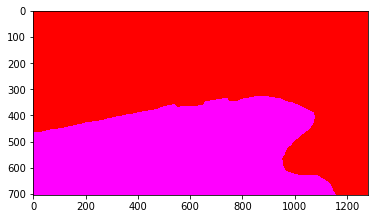

In [0]:
imshow(pred_im)

In [0]:
res.reshape((image_crf.shape[0], image_crf.shape[1], 1)
road = np.dot(road, np.array([[255, 0, 255]]))
background = np.dot(background, np.array([[255, 0, 0]]))
road_target = np.dot(road_target, np.array([[255, 0, 255]]))
background_target = np.dot(background_target, np.array([[255, 0, 0]]))

pred_im = road + background

(704, 1280)

In [0]:
sess.close()

In [0]:
label[0].shape

(704, 1280, 2)

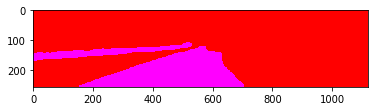

In [0]:
imshow(pred_im)

In [0]:
start_time = time.time()

im = Image.open('data/demo/uu_000095.png')
# print(im.size)
im = im.resize((width, height), Image.ANTIALIAS)

im_scaled = np.float32(im)/255.0

inputs = np.array([im_scaled])

label = sess.run(tf.math.softmax(output_label), feed_dict = {input_im: inputs})
test_label = label
#print(np.array(label).shape)
label = label[0][:, :, 1]
segmentation = (label > 0.5).reshape(height, width, 1)

#mask = 
mask = np.dot(segmentation, np.array([[0, 255, 0, 127]]))
mask = mask.astype('uint8')
mask = Image.fromarray(mask, 'RGBA')

im.paste(mask, mask = mask)

x = np.array(im)

print("--- %s seconds ---" % (time.time() - start_time))

--- 1.1712534427642822 seconds ---


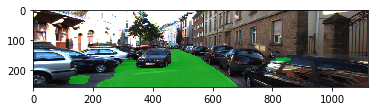

In [0]:
imshow(x)

In [0]:
print(end_points['pool4'])

Tensor("resnet_v2_101/block2/unit_4/bottleneck_v2/add:0", shape=(?, 70, 16, 512), dtype=float32)


In [0]:
# Equivalent to pool4
print(end_points[frontend_scope + '/block2'])

Tensor("resnet_v2_101/block2/unit_4/bottleneck_v2/add:0", shape=(?, 70, 16, 512), dtype=float32)


In [0]:
print(end_points['pool5'])

Tensor("resnet_v2_101/postnorm/Relu:0", shape=(?, 35, 8, 2048), dtype=float32)


In [0]:
# Equivalent to pool5
print(logits)

Tensor("resnet_v2_101/postnorm/Relu:0", shape=(?, 35, 8, 2048), dtype=float32)


In [0]:
print(end_points[frontend_scope + '/block3'])

Tensor("resnet_v2_101/block3/unit_23/bottleneck_v2/add:0", shape=(?, 35, 8, 1024), dtype=float32)


In [0]:
for key in end_points:
  print(key)

In [0]:
x = end_points[frontend_scope + '/block1']

In [0]:
print(x)

Tensor("resnet_v2_101/block1/unit_3/bottleneck_v2/add:0", shape=(?, ?, ?, 256), dtype=float32)


In [0]:
print(end_points['pool3'])

Tensor("resnet_v2_101/block1/unit_3/bottleneck_v2/add:0", shape=(?, ?, ?, 256), dtype=float32)


In [0]:
def main():
  num_classes = 2
  data_dir = './gdrive/My Drive/SemanticSegmentation/data'


In [0]:
output_dir = os.path.join(save_dir, str(time.time()))
if os.path.exists(output_dir):
  shutil.rmtree(output_dir)
os.makedirs(output_dir)

print("Training finished. Saving images to {}".format(output_dir))

for image in glob(os.path.join(test_dir, 'image_2', '*.png')):
  im = Image.open(image)
  im = im.resize((width, height), Image.ANTIALIAS)

  im_scaled = np.float32(im)/255.0
  
  inputs = np.array([im_scaled])
    
  label = sess.run(tf.math.softmax(output_label), feed_dict = {input_im: inputs})
  test_label = label
  #print(np.array(label).shape)
  label = label[0][:, :, 1]
  segmentation = (label > 0.5).reshape(height, width, 1)

  #mask = 
  mask = np.dot(segmentation, np.array([[0, 255, 0, 127]]))
  mask = mask.astype('uint8')
  mask = Image.fromarray(mask, 'RGBA')

  im.paste(mask, mask = mask)

  im.save(os.path.join(output_dir, os.path.basename(image)))